In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import anndata as ad
import scanpy as sc

In [2]:
matrix = pd.read_csv('/home/mcb/users/slaksh1/projects/scDECON_CANCER/data/PI_Segerstolpe_scRS/pancreas_refseq_counts_goodquality.csv', index_col=0)

print(matrix)

                  SGIP1  AZIN2  CLIC4  AGBL4  NECAP2  SLC45A1  TGFBR3  DBT  \
Unnamed:0                                                                    
AZ_A10                0      0      3      0       0        0       0   55   
AZ_A11                0      0      0      0       0        0       0    0   
AZ_A12                0      0      0      0       0        0       0    0   
AZ_A2                32      0      1      0       0        0       1    0   
AZ_A5                 0      0      0      0       0        0       0    0   
...                 ...    ...    ...    ...     ...      ...     ...  ...   
HP1526901T2D_P22      0      0      0      0       1        0      37    0   
HP1526901T2D_P23      0      0      0     12       1       41       0    2   
HP1526901T2D_P4       0      0      0      0       0        0      22    6   
HP1526901T2D_P7       0      0     16      0       9        0       3    0   
HP1526901T2D_P9       0      6      0      0       8        0   

In [3]:
matrix['Subject'] = matrix.index.str.split('_').str[0]
print(matrix)

                  SGIP1  AZIN2  CLIC4  AGBL4  NECAP2  SLC45A1  TGFBR3  DBT  \
Unnamed:0                                                                    
AZ_A10                0      0      3      0       0        0       0   55   
AZ_A11                0      0      0      0       0        0       0    0   
AZ_A12                0      0      0      0       0        0       0    0   
AZ_A2                32      0      1      0       0        0       1    0   
AZ_A5                 0      0      0      0       0        0       0    0   
...                 ...    ...    ...    ...     ...      ...     ...  ...   
HP1526901T2D_P22      0      0      0      0       1        0      37    0   
HP1526901T2D_P23      0      0      0     12       1       41       0    2   
HP1526901T2D_P4       0      0      0      0       0        0      22    6   
HP1526901T2D_P7       0      0     16      0       9        0       3    0   
HP1526901T2D_P9       0      6      0      0       8        0   

In [4]:
print(matrix['Subject'].unique())

['AZ' 'HP1502401' 'HP1504901' 'HP1506401' 'HP1507101' 'HP1509101'
 'HP1504101T2D' 'HP1508501T2D' 'HP1525301T2D' 'HP1526901T2D']


In [5]:
x = matrix.drop(['Celltype','Batch', 'Subject'], axis=1)
print(x)

                  SGIP1  AZIN2  CLIC4  AGBL4  NECAP2  SLC45A1  TGFBR3  DBT  \
Unnamed:0                                                                    
AZ_A10                0      0      3      0       0        0       0   55   
AZ_A11                0      0      0      0       0        0       0    0   
AZ_A12                0      0      0      0       0        0       0    0   
AZ_A2                32      0      1      0       0        0       1    0   
AZ_A5                 0      0      0      0       0        0       0    0   
...                 ...    ...    ...    ...     ...      ...     ...  ...   
HP1526901T2D_P22      0      0      0      0       1        0      37    0   
HP1526901T2D_P23      0      0      0     12       1       41       0    2   
HP1526901T2D_P4       0      0      0      0       0        0      22    6   
HP1526901T2D_P7       0      0     16      0       9        0       3    0   
HP1526901T2D_P9       0      6      0      0       8        0   

In [6]:
# x_T = x.T

In [7]:
# new = x_T[x_T.astype(bool).sum(axis=1) > 5]
# print(new)

In [8]:
# Y = new[new.astype(bool).sum(axis=1) < len(filtered)*0.8]

In [9]:
# print(Y.shape)

In [10]:
# Y = Y.T

In [11]:
X = x.values

In [48]:
def populateAnnData(mat,df, cells):
    import anndata
    adata = anndata.AnnData(X=mat)
    adata.var_names = x.columns.values
    adata.obs['cell_types'] = matrix['Celltype'].values
    adata.obs['Subject'] = matrix['Subject'].values
    adata.obs['batch_indices'] = matrix['Batch'].values
    return adata

adata = populateAnnData(X, x, matrix)
print(adata)

AnnData object with n_obs × n_vars = 2209 × 26177
    obs: 'cell_types', 'Subject', 'batch_indices'


In [49]:
print(adata.obs.Subject.unique())

['AZ' 'HP1502401' 'HP1504901' 'HP1506401' 'HP1507101' 'HP1509101'
 'HP1504101T2D' 'HP1508501T2D' 'HP1525301T2D' 'HP1526901T2D']


In [50]:
adata_filter = adata[adata.obs['cell_types'].isin(['delta cell', 'alpha cell', 'gamma cell','beta cell',]),:]
print(adata_filter)

View of AnnData object with n_obs × n_vars = 1467 × 26177
    obs: 'cell_types', 'Subject', 'batch_indices'


In [51]:
train_set = adata_filter[adata_filter.obs['Subject'].isin(['AZ','HP1502401','HP1504901','HP1506401','HP1507101',
                                                           'HP1509101']),:]
print(train_set)

View of AnnData object with n_obs × n_vars = 748 × 26177
    obs: 'cell_types', 'Subject', 'batch_indices'


In [26]:
print(train_set.var.index.values)

['SGIP1' 'AZIN2' 'CLIC4' ... 'KIR2DL4.1' 'KIR2DS3' 'KIR2DS2.1']


In [28]:
csx = pd.DataFrame(train_set.X, index=train_set.obs.cell_types.values, columns=train_set.var.index.values)
print(csx)

            SGIP1  AZIN2  CLIC4  AGBL4  NECAP2  SLC45A1  TGFBR3   DBT  RFWD2  \
delta cell    0.0    0.0    3.0    0.0     0.0      0.0     0.0  55.0    4.0   
alpha cell    0.0    0.0    0.0    0.0     0.0      0.0     0.0   0.0    9.0   
delta cell    0.0    0.0    0.0    0.0     0.0      0.0     0.0   0.0    0.0   
gamma cell   32.0    0.0    1.0    0.0     0.0      0.0     1.0   0.0    0.0   
alpha cell    0.0    0.0    0.0    0.0     0.0      0.0     0.0   0.0    0.0   
...           ...    ...    ...    ...     ...      ...     ...   ...    ...   
alpha cell    0.0    0.0    6.0    0.0    28.0      0.0     0.0   0.0   19.0   
delta cell    0.0    0.0    0.0   11.0     0.0     22.0    42.0   0.0   20.0   
alpha cell    0.0    0.0    0.0    0.0     5.0      0.0     0.0   5.0    0.0   
alpha cell    0.0    5.0    0.0    0.0     1.0      0.0     0.0   0.0    2.0   
alpha cell    0.0    0.0    0.0    0.0     1.0      0.0     0.0   1.0    3.0   

            C1orf21  ...  KIR2DS5  KIR2

In [29]:
csx = csx.T
print(csx)

           delta cell  alpha cell  delta cell  gamma cell  alpha cell  \
SGIP1             0.0         0.0         0.0        32.0         0.0   
AZIN2             0.0         0.0         0.0         0.0         0.0   
CLIC4             3.0         0.0         0.0         1.0         0.0   
AGBL4             0.0         0.0         0.0         0.0         0.0   
NECAP2            0.0         0.0         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
KIR2DS1           0.0         0.0         0.0         0.0         0.0   
KIR2DL2           0.0         0.0         0.0         0.0         0.0   
KIR2DL4.1         0.0         0.0         0.0         0.0         0.0   
KIR2DS3           0.0         0.0         0.0         0.0         0.0   
KIR2DS2.1         0.0         0.0         0.0         0.0         0.0   

           beta cell  delta cell  delta cell  alpha cell  alpha cell  ...  \
SGIP1            0.0         0.0         0.0  

In [30]:
csx.to_csv('/home/mcb/users/ssue1/DECON/data/cibersortx/segerstolpe_healthy.txt', sep='\t')

In [21]:
train_set.write('/home/mcb/users/ssue1/DECON/data/Segerstolpe/healthy/pancreas_healthy_sc_scaden.h5ad')

/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Subject' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch_indices' as categorical


In [53]:
# Basic filtering
import scanpy as sc
sc.pp.filter_cells(new, min_genes=500)
sc.pp.filter_genes(new, min_cells=5)
print(train_set)

Trying to set attribute `.obs` of view, copying.


View of AnnData object with n_obs × n_vars = 748 × 26177
    obs: 'cell_types', 'Subject', 'batch_indices'


In [54]:
sc.pp.normalize_total(new, target_sum=1e4, exclude_highly_expressed=True)

In [55]:
sc.pp.log1p(new)

In [56]:
from sklearn import preprocessing as pp

def sample_scaling(x):
    mms = pp.MinMaxScaler(feature_range=(0, 1), copy=True)
    # it scales features so transpose is needed
    x = mms.fit_transform(x.T).T
    return x

new.X = sample_scaling(new.X)

In [57]:
print(new.X)

[[0.11428385 0.         0.         ... 0.         0.05050767 0.16790725]
 [0.         0.         0.         ... 0.06461013 0.19366086 0.        ]
 [0.         0.         0.         ... 0.         0.         0.22834481]
 ...
 [0.09176462 0.         0.01060669 ... 0.         0.05181009 0.01060669]
 [0.09423798 0.         0.11064791 ... 0.         0.02982393 0.        ]
 [0.15826498 0.         0.         ... 0.         0.11099605 0.05705225]]


In [2]:
adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/mdd_healthy_sc_lake_fc_filtered_scanpp.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 23309 × 25350
    obs: 'cell_types', 'Cell_SubType', 'Subject', 'Diagnosis', 'batch_indices', 'n_genes'
    var: 'n_cells'


In [26]:
print(adata.X)

[[0.3787006  0.         0.         ... 0.         0.28841513 0.4314186 ]
 [0.         0.         0.         ... 0.2874448  0.42890576 0.        ]
 [0.         0.         0.         ... 0.         0.         0.4466488 ]
 ...
 [0.33730856 0.         0.13048877 ... 0.         0.27206418 0.13048877]
 [0.1933413  0.         0.21524353 ... 0.         0.08326757 0.        ]
 [0.24179861 0.         0.         ... 0.         0.18815589 0.11536726]]


In [91]:
adata_filter = adata[adata.obs['Subject'].isin(['AZ','HP1502401','HP1504901','HP1506401','HP1507101'
                                                           ]),:]

In [92]:
print(adata_filter)

View of AnnData object with n_obs × n_vars = 905 × 18384
    obs: 'cell_types', 'Subject', 'batch_indices', 'n_genes'
    var: 'n_cells'


In [16]:
artificial = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/Xin/Xin_bulk.h5ad')
print(artificial)

AnnData object with n_obs × n_vars = 18 × 39849
    obs: 'cell_types', 'batch_indices'


In [17]:
genes = sorted(list(set(train_set.var_names).intersection(artificial.var_names)))
print(len(genes))

23925


In [52]:
new = train_set[:, genes]

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

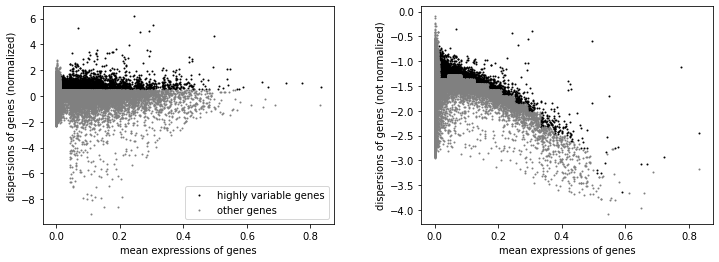

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
adata = adata[:, adata.var.highly_variable]

In [22]:
print(adata)

View of AnnData object with n_obs × n_vars = 748 × 4374
    obs: 'cell_types', 'Subject', 'batch_indices'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'


In [10]:
X_test.write('/home/mcb/users/ssue1/DECON/data/MDD/nagy_test.h5ad')

In [6]:
from sklearn.model_selection import train_test_split

X_valid, X_test, y_valid, y_test = train_test_split(X_test, X_test.obs.cell_types, test_size=0.5, random_state=10)

In [4]:
print(X_train)

View of AnnData object with n_obs × n_vars = 18647 × 25350
    obs: 'cell_types', 'Cell_SubType', 'Subject', 'Diagnosis', 'batch_indices', 'n_genes'
    var: 'n_cells'


In [7]:
merged = X_train.concatenate(X_valid)
merged

AnnData object with n_obs × n_vars = 20978 × 25350
    obs: 'cell_types', 'Cell_SubType', 'Subject', 'Diagnosis', 'batch_indices', 'n_genes', 'batch'
    var: 'n_cells'

In [33]:
X_train

View of AnnData object with n_obs × n_vars = 523 × 16436
    obs: 'cell_types', 'Subject', 'batch_indices', 'n_genes'
    var: 'n_cells'

In [33]:
adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/Segerstolpe/healthy/healthy_scaden_scanpp_xin_train.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 150 × 16436
    obs: 'Celltype', 'Subject', 'batch_indices', 'n_genes'
    var: 'n_cells'


In [44]:
new.obs.cell_types = new.obs.Celltype

/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [58]:
new

AnnData object with n_obs × n_vars = 748 × 16436
    obs: 'cell_types', 'Subject', 'batch_indices', 'n_genes'
    var: 'n_cells'
    uns: 'log1p'

In [2]:
adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/Segerstolpe/healthy/healthy_scaden_scanpp_xin.h5ad')
adata

AnnData object with n_obs × n_vars = 748 × 16436
    obs: 'cell_types', 'Subject', 'batch_indices', 'n_genes'
    var: 'n_cells'

In [3]:
df = pd.DataFrame(adata.X, index=adata.obs.index.values, columns=adata.var.index.values)

In [4]:
df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0.114284,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.050508,0.167907
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.160444,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.064610,0.193661,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.120294,0.0,0.000000,0.000000,0.000000,0.0,0.167944,0.000000,0.000000,0.228345
3,0.000000,0.0,0.008973,0.0,0.0,0.0,0.0,0.000000,0.004559,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.013249
5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.009666,0.000000,0.0,0.000000,0.000000,0.000000,0.100456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.104502,0.0,0.043314,0.0,0.0,0.0,0.0,0.073662,0.055148,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.026907,0.052285,0.000000,0.033709
1088,0.125668,0.0,0.000000,0.0,0.0,0.0,0.0,0.071460,0.000000,0.016578,...,0.000000,0.0,0.054906,0.000000,0.047495,0.0,0.026358,0.000000,0.000000,0.054906
1090,0.091765,0.0,0.010607,0.0,0.0,0.0,0.0,0.007157,0.095589,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.010607,0.000000,0.051810,0.010607
1091,0.094238,0.0,0.110648,0.0,0.0,0.0,0.0,0.094238,0.216435,0.000000,...,0.000000,0.0,0.029824,0.000000,0.000000,0.0,0.000000,0.000000,0.029824,0.000000


In [5]:
cells = adata.obs.cell_types
cells

0       delta cell
1       alpha cell
2       delta cell
3       gamma cell
5       alpha cell
           ...    
1086    alpha cell
1088    delta cell
1090    alpha cell
1091    alpha cell
1093    alpha cell
Name: cell_types, Length: 748, dtype: category
Categories (4, object): ['alpha cell', 'beta cell', 'delta cell', 'gamma cell']

In [7]:
cells.to_csv('/home/mcb/users/ssue1/DECON/data/Segerstolpe/healthy/healthy_scaden_scanpp_xin_cells.csv')